In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [35]:
smart_subs = pd.read_csv('PH_Opin_Smart.csv')
smart_subs.head()

,FAN_ID,LPSUBSFLAG,ORDER_FISCAL_YEAR,ORDER_DATE_EST,ACCOUNT_CREATED_DATE_EST,DATES_MATCH
0,166658292,Promo Code Win-back,2025,21/4/2025,25/4/2017,False
1,18591355305,Prior Paying Subscriber,2025,27/3/2025,20/2/2025,False
2,672090853,New Subscribers,2025,8/11/2024,28/10/2021,False
3,227240437,New Subscribers,2025,20/4/2025,22/5/2022,False
4,69450035,Prior Paying Subscriber,2025,11/12/2024,2/11/2020,False


# Cleaning Data

In [36]:
smart_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   FAN_ID                    5384 non-null   int64 
 1   LPSUBSFLAG                5384 non-null   object
 2   ORDER_FISCAL_YEAR         5384 non-null   int64 
 3   ORDER_DATE_EST            5384 non-null   object
 4   ACCOUNT_CREATED_DATE_EST  5382 non-null   object
 5   DATES_MATCH               5382 non-null   object
dtypes: int64(2), object(4)
memory usage: 252.5+ KB


In [37]:
#seems like there's just a couple of missing values

In [38]:
smart_subs['ACCOUNT_CREATED_DATE_EST'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5379    False
5380    False
5381    False
5382    False
5383    False
Name: ACCOUNT_CREATED_DATE_EST, Length: 5384, dtype: bool

In [39]:
import missingno as msno

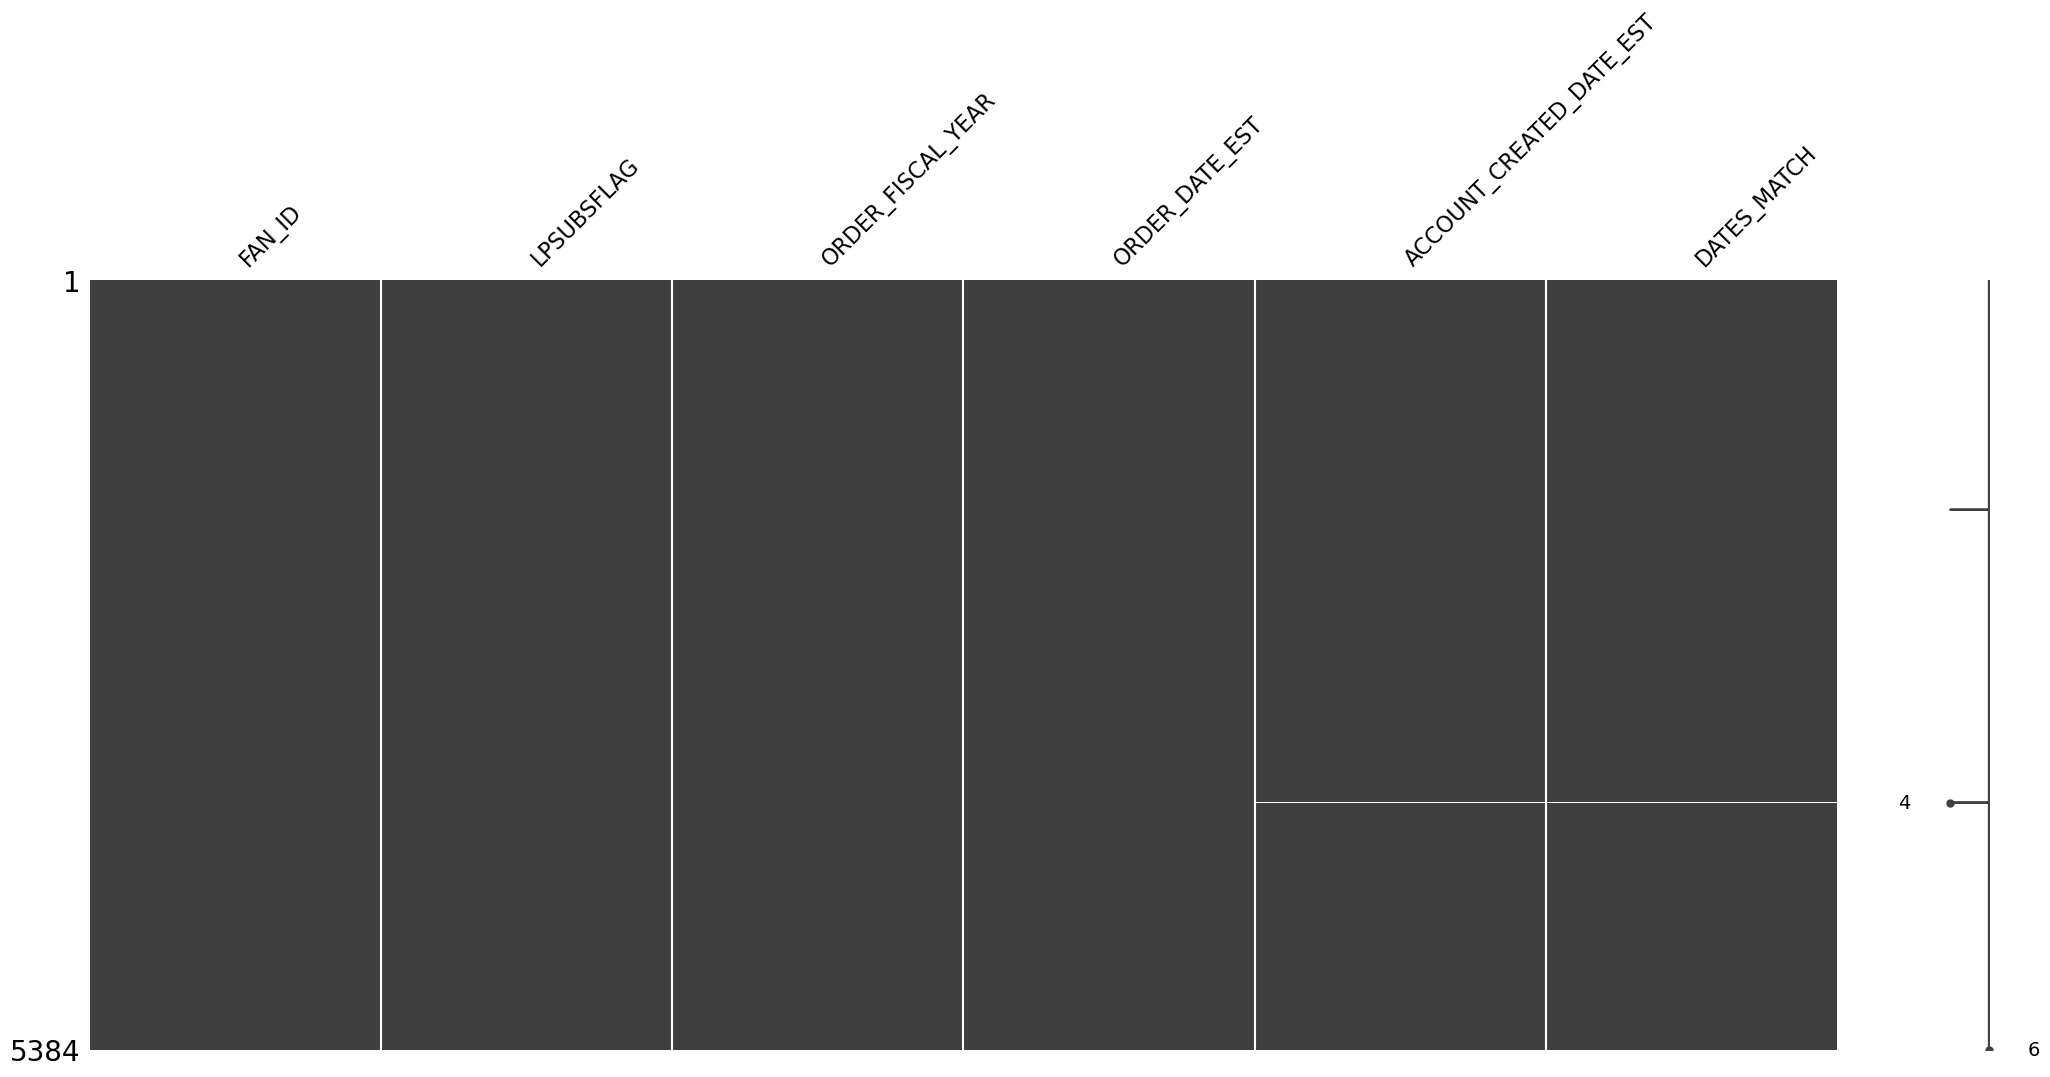

In [40]:
msno.matrix(smart_subs)
plt.show()

In [41]:
#now we can visualize the missing values as a distribution across columns inside the account created and dates match column

In [42]:
#since there's only two missing values as a proportion of the dataset its small so let's remove them

In [43]:
missing = smart_subs[smart_subs['ACCOUNT_CREATED_DATE_EST'].isna()] #lets see the missing values
missing

,FAN_ID,LPSUBSFLAG,ORDER_FISCAL_YEAR,ORDER_DATE_EST,ACCOUNT_CREATED_DATE_EST,DATES_MATCH
1605,-1,Prior Paying Subscriber,2025,18/3/2025,NaN,NaN
3653,-1,Prior Paying Subscriber,2023,18/11/2022,NaN,NaN


In [44]:
smart_subs_dropped = smart_subs.dropna(subset = ['ACCOUNT_CREATED_DATE_EST'])
smart_subs_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5382 entries, 0 to 5383
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   FAN_ID                    5382 non-null   int64 
 1   LPSUBSFLAG                5382 non-null   object
 2   ORDER_FISCAL_YEAR         5382 non-null   int64 
 3   ORDER_DATE_EST            5382 non-null   object
 4   ACCOUNT_CREATED_DATE_EST  5382 non-null   object
 5   DATES_MATCH               5382 non-null   object
dtypes: int64(2), object(4)
memory usage: 294.3+ KB


In [45]:
smart_subs = smart_subs_dropped
smart_subs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5382 entries, 0 to 5383
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   FAN_ID                    5382 non-null   int64 
 1   LPSUBSFLAG                5382 non-null   object
 2   ORDER_FISCAL_YEAR         5382 non-null   int64 
 3   ORDER_DATE_EST            5382 non-null   object
 4   ACCOUNT_CREATED_DATE_EST  5382 non-null   object
 5   DATES_MATCH               5382 non-null   object
dtypes: int64(2), object(4)
memory usage: 294.3+ KB


In [46]:
#next I want to rename values in the LPSUBSFLAG column

In [58]:
smart_subs.head()

,FAN_ID,LPSUBSFLAG,ORDER_FISCAL_YEAR,ORDER_DATE_EST,ACCOUNT_CREATED_DATE_EST,DATES_MATCH
0,166658292,Prior Paying Subscriber,2025,21/4/2025,25/4/2017,False
1,18591355305,Prior Paying Subscriber,2025,27/3/2025,20/2/2025,False
2,672090853,New Subscribers,2025,8/11/2024,28/10/2021,False
3,227240437,New Subscribers,2025,20/4/2025,22/5/2022,False
4,69450035,Prior Paying Subscriber,2025,11/12/2024,2/11/2020,False


In [59]:
smart_subs.loc[smart_subs['LPSUBSFLAG'] == 'Promo Code Win-back', 'LPSUBSFLAG'] = 'Prior Paying Subscriber'

In [60]:
smart_subs.head()

,FAN_ID,LPSUBSFLAG,ORDER_FISCAL_YEAR,ORDER_DATE_EST,ACCOUNT_CREATED_DATE_EST,DATES_MATCH
0,166658292,Prior Paying Subscriber,2025,21/4/2025,25/4/2017,False
1,18591355305,Prior Paying Subscriber,2025,27/3/2025,20/2/2025,False
2,672090853,New Subscribers,2025,8/11/2024,28/10/2021,False
3,227240437,New Subscribers,2025,20/4/2025,22/5/2022,False
4,69450035,Prior Paying Subscriber,2025,11/12/2024,2/11/2020,False


In [61]:
smart_subs['LPSUBSFLAG'].value_counts()

Prior Paying Subscriber    3834
New Subscribers            1548
Name: LPSUBSFLAG, dtype: int64

In [62]:
#we can already tell now that the prior paying subs outweigh the new subscribers from this channel significantly 

In [63]:
#now lets deal with the datetime data columns

In [65]:
smart_subs['ORDER_DATE_EST'] = pd.to_datetime(smart_subs['ORDER_DATE_EST'], dayfirst=True, errors='coerce')
smart_subs['ACCOUNT_CREATED_DATE_EST'] = pd.to_datetime(smart_subs['ACCOUNT_CREATED_DATE_EST'], dayfirst=True, errors='coerce')

#results
smart_subs.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 5382 entries, 0 to 5383
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FAN_ID                    5382 non-null   int64         
 1   LPSUBSFLAG                5382 non-null   object        
 2   ORDER_FISCAL_YEAR         5382 non-null   int64         
 3   ORDER_DATE_EST            5382 non-null   datetime64[ns]
 4   ACCOUNT_CREATED_DATE_EST  5382 non-null   datetime64[ns]
 5   DATES_MATCH               5382 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 294.3+ KB


In [66]:
smart_subs

,FAN_ID,LPSUBSFLAG,ORDER_FISCAL_YEAR,ORDER_DATE_EST,ACCOUNT_CREATED_DATE_EST,DATES_MATCH
0,166658292,Prior Paying Subscriber,2025,2025-04-21,2017-04-25,False
1,18591355305,Prior Paying Subscriber,2025,2025-03-27,2025-02-20,False
2,672090853,New Subscribers,2025,2024-11-08,2021-10-28,False
3,227240437,New Subscribers,2025,2025-04-20,2022-05-22,False
4,69450035,Prior Paying Subscriber,2025,2024-12-11,2020-11-02,False
...,...,...,...,...,...,...
5379,17899665,Prior Paying Subscriber,2023,2022-11-13,2020-08-21,False
5380,32324595,Prior Paying Subscriber,2023,2023-01-12,2019-10-23,False
5381,362754385,Prior Paying Subscriber,2023,2023-01-12,2017-10-28,False
5382,147056652,New Subscribers,2023,2023-04-21,2023-04-21,True


# Exploratory Data Analysis

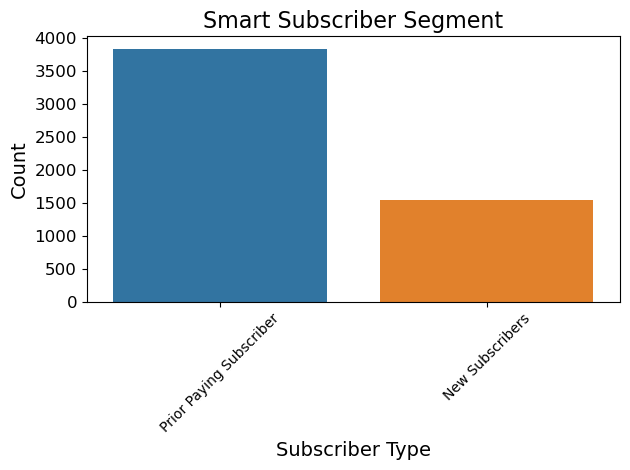

In [68]:
#firstly whats the split between new subs and prior subs

sns.countplot(x='LPSUBSFLAG', data=smart_subs, order=smart_subs['LPSUBSFLAG'].value_counts().index)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.title('Smart Subscriber Segment', fontsize=16)
plt.xlabel('Subscriber Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

In [71]:
#Prior subs are about 2/3rds of the total
#lets calculate the ratio for new
smart_subs_new_count = smart_subs[smart_subs['LPSUBSFLAG'].isin(['New Subscribers'])].shape[0]
total_size = smart_subs.shape[0]
new_proportion = smart_subs_new_count / total_size
print(new_proportion)

#and now for prior subs

smart_subs_prior_count = smart_subs[smart_subs['LPSUBSFLAG'].isin(['Prior Paying Subscriber'])].shape[0]
prior_proportion = smart_subs_prior_count / total_size
print(prior_proportion)

0.28762541806020064
0.7123745819397993


In [72]:
#I wonder if this ratio differs by year? 

In [79]:
grouped_subs = smart_subs.groupby('ORDER_FISCAL_YEAR')['LPSUBSFLAG'].value_counts()
grouped_subs

ORDER_FISCAL_YEAR  LPSUBSFLAG             
2023               Prior Paying Subscriber    1577
                   New Subscribers             387
2024               Prior Paying Subscriber    1142
                   New Subscribers             479
2025               Prior Paying Subscriber    1115
                   New Subscribers             682
Name: LPSUBSFLAG, dtype: int64

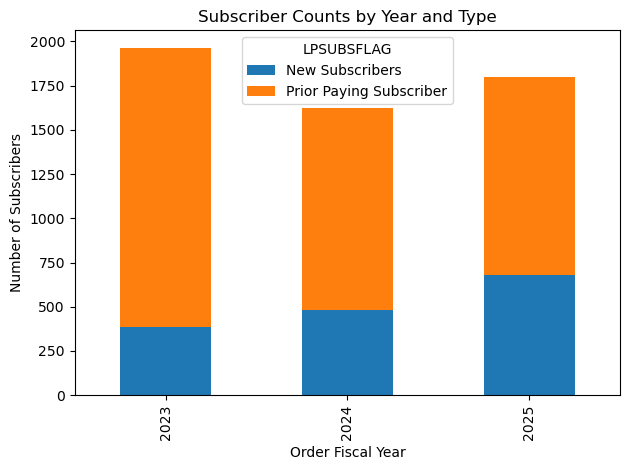

In [80]:
# Unstack to convert LPSUBSFLAG into columns
plot_data = grouped_subs.unstack()

# Plot
plot_data.plot(kind='bar', stacked=True)

plt.xlabel('Order Fiscal Year')
plt.ylabel('Number of Subscribers')
plt.title('Subscriber Counts by Year and Type')
plt.legend(title='LPSUBSFLAG')
plt.tight_layout()
plt.show()

In [81]:
#lets edit a little bit...

In [83]:
plot_data = grouped_subs.unstack().fillna(0)
plot_data

LPSUBSFLAG,New Subscribers,Prior Paying Subscriber
ORDER_FISCAL_YEAR,,
2023,387,1577
2024,479,1142
2025,682,1115


In [84]:
percent_data = plot_data.div(plot_data.sum(axis=1), axis=0) * 100
percent_data

LPSUBSFLAG,New Subscribers,Prior Paying Subscriber
ORDER_FISCAL_YEAR,,
2023,19.704684,80.295316
2024,29.549661,70.450339
2025,37.952142,62.047858


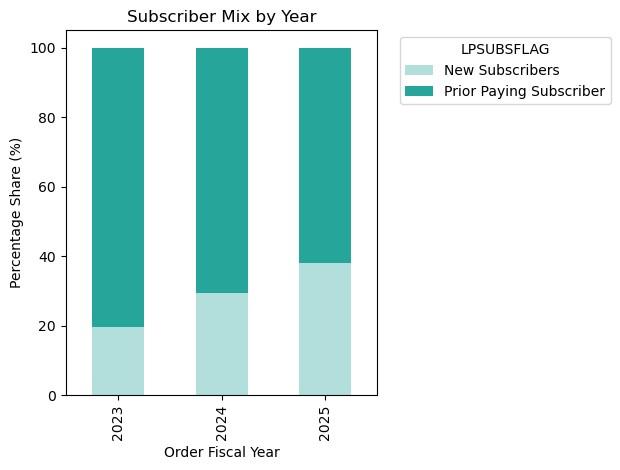

In [88]:
import matplotlib.colors as mcolors

# Soft blue shades manually defined
soft_blues = ['#b2dfdb', '#26a69a']  # lets try teal

percent_data.plot(kind='bar', stacked=True, color=soft_blues)

plt.xlabel('Order Fiscal Year')
plt.ylabel('Percentage Share (%)')
plt.title('Subscriber Mix by Year')
plt.legend(title='LPSUBSFLAG', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [90]:
#so actually we can see that the number of new subscribers is increasing YoY
#let's visualize this in a line chart to view the change in number of subs each year

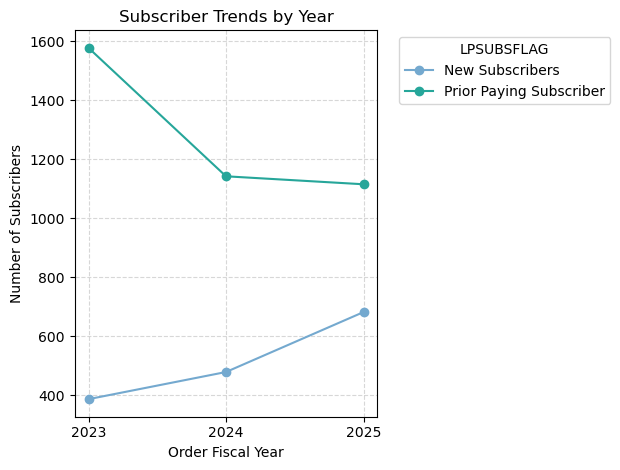

In [95]:
# Plot line chart instead of bar chart

colors = ['#74a9cf', '#26a69a']
ax = plot_data.plot(kind='line', marker='o', color=colors)


plt.xlabel('Order Fiscal Year')
plt.ylabel('Number of Subscribers')
plt.title('Subscriber Trends by Year')
plt.legend(title='LPSUBSFLAG', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)


# Fix: set x-ticks to show whole numbers
ax.set_xticks(plot_data.index)
ax.set_xticklabels(plot_data.index.astype(int))

plt.tight_layout()
plt.show()


In [96]:
#so we can observe the changes in the different subscriber status over the last three years

In [97]:
#now we need to find out some statistics around individual customers to determine if we should stop using this sales channel

In [98]:
individual_subs = smart_subs.groupby('FAN_ID')['LPSUBSFLAG'].value_counts()
individual_subs

FAN_ID       LPSUBSFLAG             
10955        New Subscribers            1
             Prior Paying Subscriber    1
158628       Prior Paying Subscriber    2
204390       Prior Paying Subscriber    1
275082       Prior Paying Subscriber    1
                                       ..
20427514867  New Subscribers            1
20430039851  New Subscribers            1
20454774617  New Subscribers            1
20456025008  New Subscribers            1
20460653617  New Subscribers            1
Name: LPSUBSFLAG, Length: 3182, dtype: int64

In [99]:
#a unique fan id could have multiple LPSUBSFLAGs if they changed subscription status over time
#for example 10955 was a new subscriber at one point then upon next purchas they became a prior existing subscriber
#now that we know around 70% of all subscribers were existing subs, does it also mean that those existing subs are subscribing each year?

In [101]:
#lets start with the distribution of unique_fan ids across year fiscal year

cust_freq = (
    smart_subs
    .groupby(['ORDER_FISCAL_YEAR', 'FAN_ID'])
    .size()
    .reset_index(name='purchase_count')
)


cust_freq

,ORDER_FISCAL_YEAR,FAN_ID,purchase_count
0,2023,10955,1
1,2023,158628,2
2,2023,204390,1
3,2023,275082,1
4,2023,339847,1
...,...,...,...
3283,2025,20427514867,1
3284,2025,20430039851,1
3285,2025,20454774617,1
3286,2025,20456025008,1


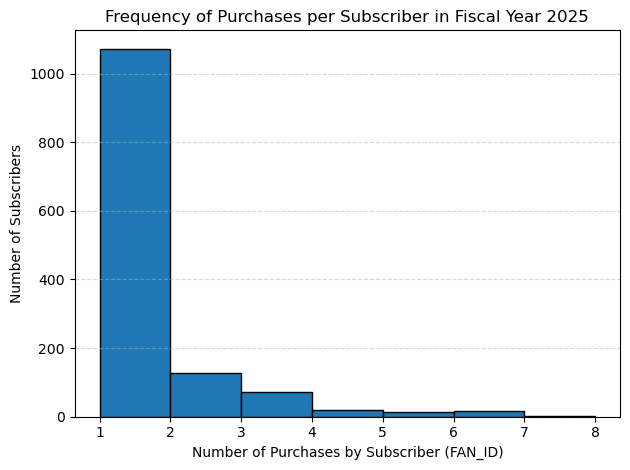

In [107]:
freq_2025 = cust_freq[cust_freq['ORDER_FISCAL_YEAR'] == 2025] #filter to 2025 first



plt.hist(freq_2025['purchase_count'], bins=range(1, freq_2025['purchase_count'].max() + 2), edgecolor='black')

plt.xlabel('Number of Purchases by Subscriber (FAN_ID)')
plt.ylabel('Number of Subscribers')
plt.title('Frequency of Purchases per Subscriber in Fiscal Year 2025')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [106]:
#so in 2025, most of the subscribers purcashed 1 time
#the subscription on offer is only 1 month so this also means that users are not repeat users in the same fiscal that much

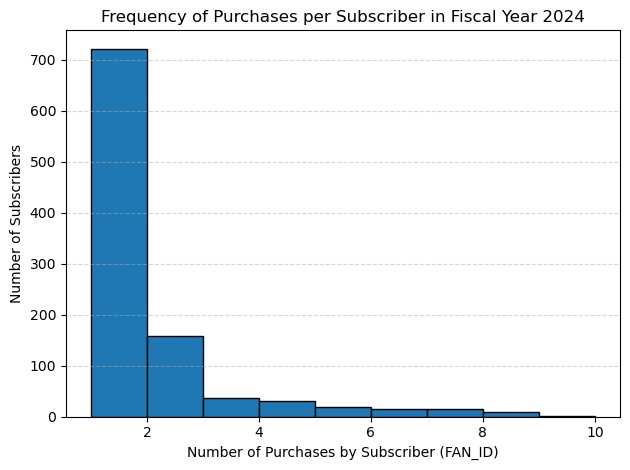

In [108]:
freq_2024 = cust_freq[cust_freq['ORDER_FISCAL_YEAR'] == 2024] #now 2024



plt.hist(freq_2024['purchase_count'], bins=range(1, freq_2024['purchase_count'].max() + 2), edgecolor='black')

plt.xlabel('Number of Purchases by Subscriber (FAN_ID)')
plt.ylabel('Number of Subscribers')
plt.title('Frequency of Purchases per Subscriber in Fiscal Year 2024')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


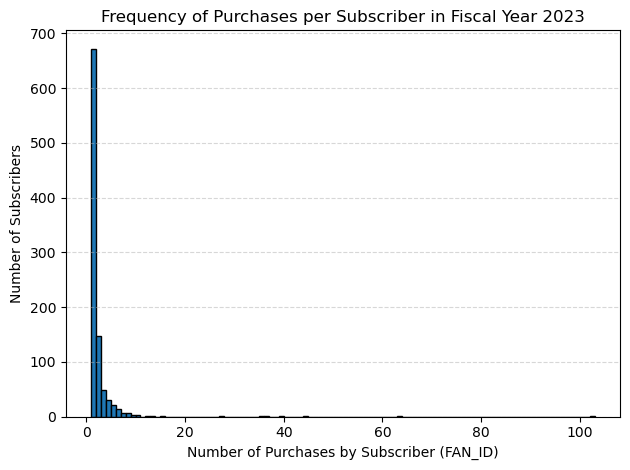

In [110]:
freq_2023 = cust_freq[cust_freq['ORDER_FISCAL_YEAR'] == 2023] #now 2023



plt.hist(freq_2023['purchase_count'], bins=range(1, freq_2023['purchase_count'].max() + 2), edgecolor='black')

plt.xlabel('Number of Purchases by Subscriber (FAN_ID)')
plt.ylabel('Number of Subscribers')
plt.title('Frequency of Purchases per Subscriber in Fiscal Year 2023')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [111]:
freq_2023

,ORDER_FISCAL_YEAR,FAN_ID,purchase_count
0,2023,10955,1
1,2023,158628,2
2,2023,204390,1
3,2023,275082,1
4,2023,339847,1
...,...,...,...
958,2023,11557583644,5
959,2023,11557984760,2
960,2023,11559576195,3
961,2023,11559806483,1


In [113]:
freq_2023.describe()

,ORDER_FISCAL_YEAR,FAN_ID,purchase_count
count,963.0,9.630000e+02,963.000000
mean,2023.0,4.732902e+08,2.039460
std,0.0,1.682108e+09,4.790464
min,2023.0,1.095500e+04,1.000000
25%,2023.0,2.719984e+07,1.000000
50%,2023.0,7.556233e+07,1.000000
75%,2023.0,1.537148e+08,2.000000
max,2023.0,1.156183e+10,102.000000


In [115]:
#max purchase count in 2023 was > 100? seems unlikely

freq_10 = freq_2023[freq_2023['purchase_count'] > 10]
freq_10

,ORDER_FISCAL_YEAR,FAN_ID,purchase_count
15,2023,1574488,27
25,2023,2645742,35
38,2023,3802833,15
80,2023,8310081,13
136,2023,15722845,44
168,2023,17899665,36
299,2023,38016121,12
337,2023,43816614,63
884,2023,362754385,39
916,2023,3193153118,102


In [116]:
#if these users subscribed so many times in 2023 did they continue in following years?

In [118]:
high_freq_2023 = cust_freq[
    (cust_freq['ORDER_FISCAL_YEAR'] == 2023) & 
    (cust_freq['purchase_count'] > 10)]
    
high_freq_2023

,ORDER_FISCAL_YEAR,FAN_ID,purchase_count
15,2023,1574488,27
25,2023,2645742,35
38,2023,3802833,15
80,2023,8310081,13
136,2023,15722845,44
168,2023,17899665,36
299,2023,38016121,12
337,2023,43816614,63
884,2023,362754385,39
916,2023,3193153118,102


In [119]:

high_freq_fan_ids = high_freq_2023['FAN_ID'].unique()

print(f"Suspicious high-frequency users in 2023: {len(high_freq_fan_ids)}")

Suspicious high-frequency users in 2023: 10


In [120]:
#lets check these fan_ids in 2024 and 2025
subsequent_years = cust_freq[
    (cust_freq['ORDER_FISCAL_YEAR'].isin([2024, 2025])) &
    (cust_freq['FAN_ID'].isin(high_freq_fan_ids))]

print(subsequent_years)

      ORDER_FISCAL_YEAR     FAN_ID  purchase_count
1010               2024    8310081               5
1504               2024  362754385               2


In [130]:
#it looks like we can remove all 10

In [131]:
high_freq_fan_ids

['1574488',
 '2645742',
 '3802833',
 '8310081',
 '15722845',
 '17899665',
 '38016121',
 '43816614',
 '362754385',
 '3193153118']

In [132]:
print(smart_subs['FAN_ID'].dtype)          
print(type(high_freq_fan_ids[0]))          


int64
<class 'str'>


In [136]:
#cast both as str
smart_subs['FAN_ID'] = smart_subs['FAN_ID'].astype(str)
high_freq_fan_ids = [str(fid) for fid in high_freq_fan_ids]

cleaned_smart_subs = smart_subs[~smart_subs['FAN_ID'].isin(high_freq_fan_ids)]


In [137]:
print(f"Are any high-frequency FAN_IDs remaining? {cleaned_smart_subs['FAN_ID'].isin(high_freq_fan_ids).any()}")


Are any high-frequency FAN_IDs remaining? False


In [135]:
cleaned_smart_subs

,FAN_ID,LPSUBSFLAG,ORDER_FISCAL_YEAR,ORDER_DATE_EST,ACCOUNT_CREATED_DATE_EST,DATES_MATCH
0,166658292,Prior Paying Subscriber,2025,2025-04-21,2017-04-25,False
1,18591355305,Prior Paying Subscriber,2025,2025-03-27,2025-02-20,False
2,672090853,New Subscribers,2025,2024-11-08,2021-10-28,False
3,227240437,New Subscribers,2025,2025-04-20,2022-05-22,False
4,69450035,Prior Paying Subscriber,2025,2024-12-11,2020-11-02,False
...,...,...,...,...,...,...
5377,5980564,Prior Paying Subscriber,2023,2023-05-10,2022-06-08,False
5378,17805352,Prior Paying Subscriber,2023,2023-05-10,2022-06-04,False
5380,32324595,Prior Paying Subscriber,2023,2023-01-12,2019-10-23,False
5382,147056652,New Subscribers,2023,2023-04-21,2023-04-21,True


In [138]:
#now we can rebuild our frequency table with the cleaned data

clean_cust_freq = (
    cleaned_smart_subs
    .groupby(['ORDER_FISCAL_YEAR', 'FAN_ID'])
    .size()
    .reset_index(name='purchase_count')
)


clean_cust_freq

,ORDER_FISCAL_YEAR,FAN_ID,purchase_count
0,2023,100022718,1
1,2023,100301775,2
2,2023,100315592,1
3,2023,100409103,1
4,2023,101083114,2
...,...,...,...
3271,2025,99158387,2
3272,2025,9945274,1
3273,2025,9990316,1
3274,2025,99915710,1


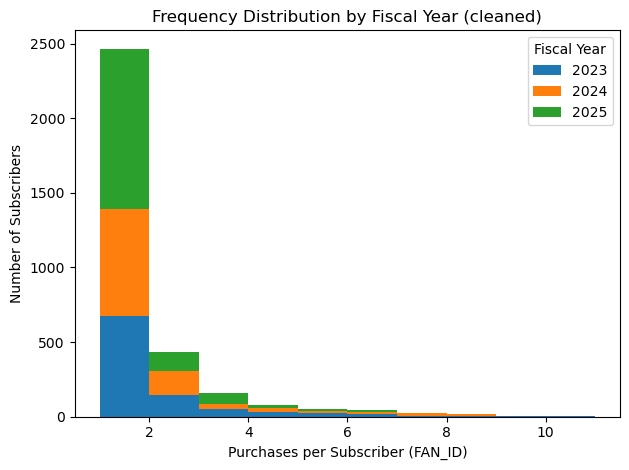

In [139]:
plt.hist(
    [clean_cust_freq[clean_cust_freq['ORDER_FISCAL_YEAR'] == year]['purchase_count'] 
     for year in clean_cust_freq['ORDER_FISCAL_YEAR'].unique()],
    bins=range(1, clean_cust_freq['purchase_count'].max() + 2),
    stacked=True,
    label=clean_cust_freq['ORDER_FISCAL_YEAR'].unique()
)

plt.xlabel('Purchases per Subscriber (FAN_ID)')
plt.ylabel('Number of Subscribers')
plt.title('Frequency Distribution by Fiscal Year (cleaned)')
plt.legend(title='Fiscal Year')
plt.tight_layout()
plt.show()


In [140]:
# Get distinct LPSUBSFLAG for each FAN_ID and Fiscal Year
subs_flags = cleaned_smart_subs[['FAN_ID', 'ORDER_FISCAL_YEAR', 'LPSUBSFLAG']].drop_duplicates()

# Merge with frequency dataframe
merged_smart_subs = clean_cust_freq.merge(
    subs_flags,
    on=['FAN_ID', 'ORDER_FISCAL_YEAR'],
    how='left'
)

merged_smart_subs

,ORDER_FISCAL_YEAR,FAN_ID,purchase_count,LPSUBSFLAG
0,2023,100022718,1,Prior Paying Subscriber
1,2023,100301775,2,Prior Paying Subscriber
2,2023,100315592,1,New Subscribers
3,2023,100409103,1,New Subscribers
4,2023,101083114,2,Prior Paying Subscriber
...,...,...,...,...
3473,2025,99158387,2,Prior Paying Subscriber
3474,2025,9945274,1,Prior Paying Subscriber
3475,2025,9990316,1,Prior Paying Subscriber
3476,2025,99915710,1,New Subscribers


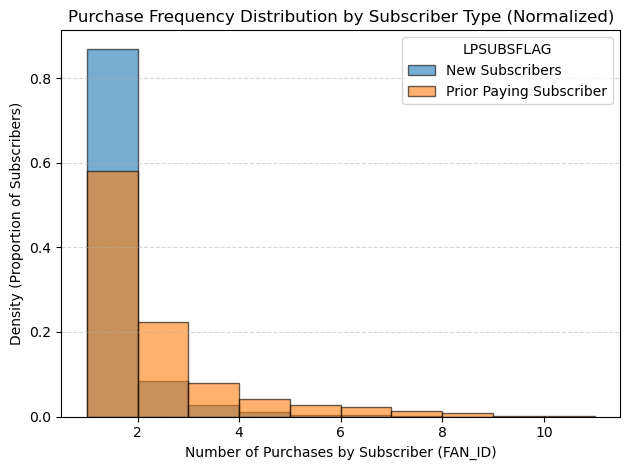

In [142]:
# Define bins
bins = range(1, merged_smart_subs['purchase_count'].max() + 2)

# Define subscriber categories
subscriber_types = ['New Subscribers', 'Prior Paying Subscriber']

# Plot normalized histogram (percentage distribution)
for sub_type in subscriber_types:
    subset = merged_smart_subs[merged_smart_subs['LPSUBSFLAG'] == sub_type]
    plt.hist(
        subset['purchase_count'],
        bins=bins,
        alpha=0.6,
        label=sub_type,
        edgecolor='black',
        density=True  # 🔔 Normalize to percentage shape
    )

plt.xlabel('Number of Purchases by Subscriber (FAN_ID)')
plt.ylabel('Density (Proportion of Subscribers)')
plt.title('Purchase Frequency Distribution by Subscriber Type (Normalized)')
plt.legend(title='LPSUBSFLAG')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


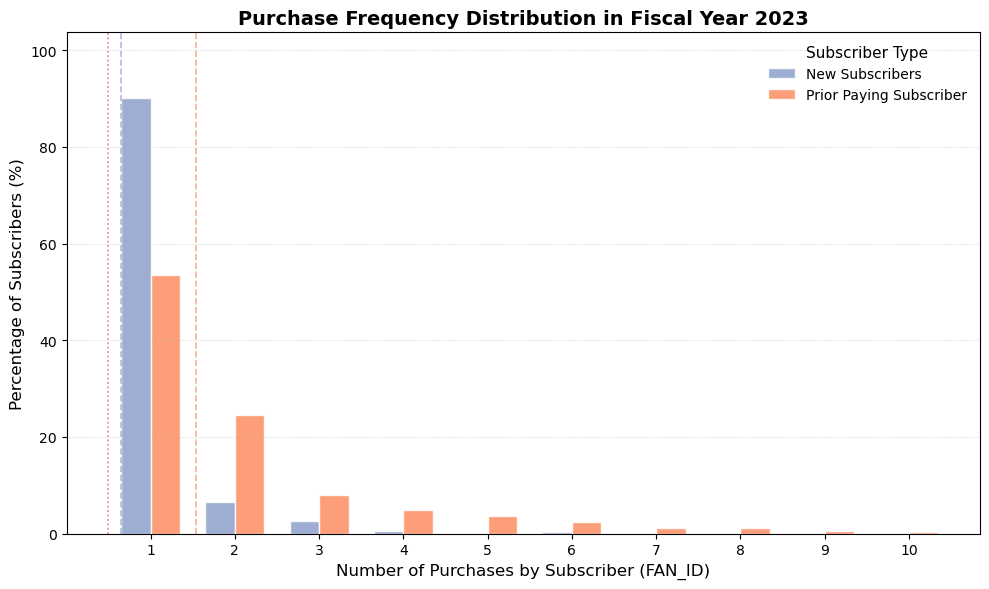

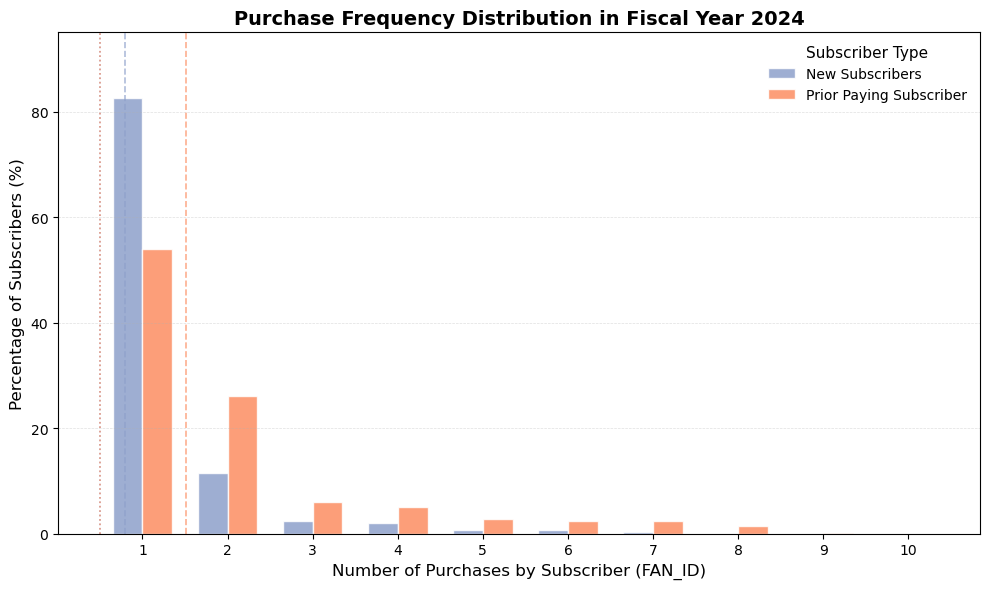

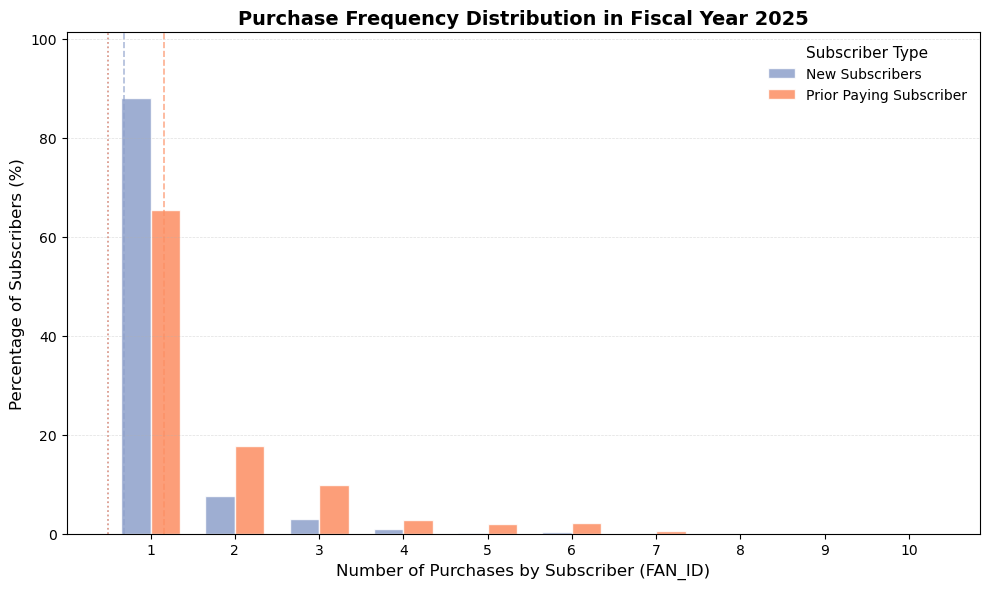

In [144]:
# Softer colors for presentation
colors = {
    'New Subscribers': '#8da0cb',       # Muted blue
    'Prior Paying Subscriber': '#fc8d62'  # Muted orange
}

subscriber_types = ['New Subscribers', 'Prior Paying Subscriber']
fiscal_years = sorted(merged_smart_subs['ORDER_FISCAL_YEAR'].unique())
bins = range(1, merged_smart_subs['purchase_count'].max() + 2)

for year in fiscal_years:
    plt.figure(figsize=(10, 6))
    
    width = 0.35
    bin_centers = np.array(bins[:-1]) + 0.5  # Center bins for integer ticks
    
    max_height = 0  # Track max for y-limit adjustment
    
    for i, sub_type in enumerate(subscriber_types):
        subset = merged_smart_subs[
            (merged_smart_subs['ORDER_FISCAL_YEAR'] == year) & 
            (merged_smart_subs['LPSUBSFLAG'] == sub_type)
        ]
        
        counts, _ = np.histogram(subset['purchase_count'], bins=bins)
        percentages = counts / counts.sum() * 100 if counts.sum() > 0 else np.zeros_like(counts)
        
        bar_positions = bin_centers + (i - 0.5) * width
        bars = plt.bar(
            bar_positions, percentages, width=width, 
            label=sub_type, alpha=0.85, edgecolor='white', 
            color=colors[sub_type]
        )
        
        # Annotate mean and median visually
        mean_val = subset['purchase_count'].mean()
        median_val = subset['purchase_count'].median()
        
        plt.axvline(mean_val, color=colors[sub_type], linestyle='--', linewidth=1.2, alpha=0.7)
        plt.axvline(median_val, color=colors[sub_type], linestyle=':', linewidth=1.2, alpha=0.7)
        
        # Optional: annotate on top of bars
        for bar in bars:
            height = bar.get_height()
            max_height = max(max_height, height)
    
    # Axis labels and title
    plt.xlabel('Number of Purchases by Subscriber (FAN_ID)', fontsize=12)
    plt.ylabel('Percentage of Subscribers (%)', fontsize=12)
    plt.title(f'Purchase Frequency Distribution in Fiscal Year {year}', fontsize=14, weight='bold')
    
    plt.xticks(bin_centers, bins[:-1], fontsize=10)
    plt.yticks(fontsize=10)
    
    # Y limit with headroom for annotations
    plt.ylim(0, max_height * 1.15)
    
    # Grid style
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.4)
    
    # Legend styling
    plt.legend(title='Subscriber Type', fontsize=10, title_fontsize=11, frameon=False, loc='upper right')
    
    plt.tight_layout()
    plt.show()



In [147]:
#current learnings
#out of all subscribers driven by Smart, most are prior subscribers or repeat subscribers vs net new
#that trend is decreasing and we're getting more new subscribers
#out of the new subscribers in each fiscal year the purchase frequency increases above 1 for prior subs, which makes sense
#so prior subs make multiple purchases within one year, with 2 per year around 20% of all transactions in a fiscal

In [148]:
#the next question - are prior subs making repeat purchases across years? 

In [149]:
# Get dataset of prior subscribers only
prior_subs = cleaned_smart_subs[cleaned_smart_subs['LPSUBSFLAG'] == 'Prior Paying Subscriber']

# Count unique fiscal years per FAN_ID
fan_year_counts = prior_subs.groupby('FAN_ID')['ORDER_FISCAL_YEAR'].nunique().reset_index(name='years_active')

# Analyze distribution:
print(fan_year_counts['years_active'].value_counts())


1    1376
2     190
3      58
Name: years_active, dtype: int64


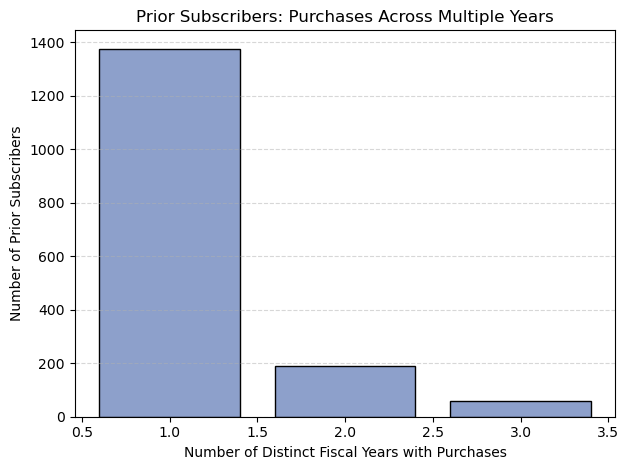

In [150]:
years_distribution = fan_year_counts['years_active'].value_counts().sort_index()

plt.bar(years_distribution.index, years_distribution.values, color='#8da0cb', edgecolor='black')

plt.xlabel('Number of Distinct Fiscal Years with Purchases')
plt.ylabel('Number of Prior Subscribers')
plt.title('Prior Subscribers: Purchases Across Multiple Years')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [151]:
#so we can see that most of the prior subs purchase repeatedly within one year, but not across years, 
#showing low repeat business

In [152]:
# For each FAN_ID: max yearly purchase count and years active
fan_summary = (
    cleaned_smart_subs[cleaned_smart_subs['LPSUBSFLAG'] == 'Prior Paying Subscriber']
    .groupby('FAN_ID')
    .agg(
        years_active=('ORDER_FISCAL_YEAR', 'nunique'),
        max_purchases=('FAN_ID', 'count')
    )
    .reset_index()
)

fan_summary

,FAN_ID,years_active,max_purchases
0,100022718,2,3
1,100301775,1,2
2,100635310,1,1
3,10076553180,1,1
4,100914062,1,1
...,...,...,...
1619,9990316,1,1
1620,99917071,2,9
1621,99942694,1,2
1622,99944677,1,1


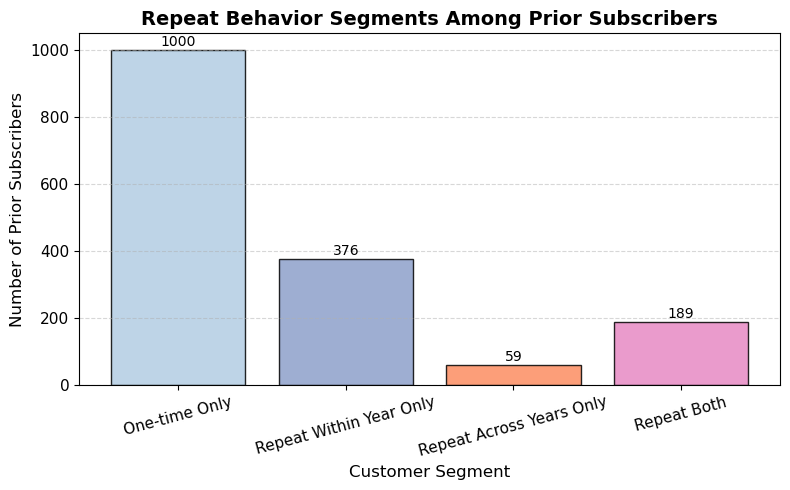

In [153]:
# Prior subscribers only
prior_subs = cleaned_smart_subs[cleaned_smart_subs['LPSUBSFLAG'] == 'Prior Paying Subscriber']

# Compute years active per FAN_ID
years_active = prior_subs.groupby('FAN_ID')['ORDER_FISCAL_YEAR'].nunique()

# Compute max purchase frequency within a single year per FAN_ID
freq_per_year = (
    prior_subs
    .groupby(['FAN_ID', 'ORDER_FISCAL_YEAR'])
    .size()
    .groupby('FAN_ID')
    .max()
)

# Build combined classification
repeat_analysis = pd.DataFrame({
    'years_active': years_active,
    'max_purchases_per_year': freq_per_year
}).fillna(0)

# Define flags
repeat_analysis['repeat_across_years'] = repeat_analysis['years_active'] > 1
repeat_analysis['repeat_within_year'] = repeat_analysis['max_purchases_per_year'] > 1


def classify(row):
    if row['repeat_across_years'] and row['repeat_within_year']:
        return 'Repeat Both'
    elif row['repeat_across_years']:
        return 'Repeat Across Years Only'
    elif row['repeat_within_year']:
        return 'Repeat Within Year Only'
    else:
        return 'One-time Only'

repeat_analysis['segment'] = repeat_analysis.apply(classify, axis=1)


import matplotlib.pyplot as plt

# Count users in each segment
segment_counts = repeat_analysis['segment'].value_counts().reindex(
    ['One-time Only', 'Repeat Within Year Only', 'Repeat Across Years Only', 'Repeat Both']
)

colors = ['#b3cde3', '#8da0cb', '#fc8d62', '#e78ac3']  # Soft palette

plt.figure(figsize=(8, 5))
bars = plt.bar(segment_counts.index, segment_counts.values, color=colors, edgecolor='black', alpha=0.85)

# Add text labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Prior Subscribers', fontsize=12)
plt.title('Repeat Behavior Segments Among Prior Subscribers', fontsize=14, weight='bold')
plt.xticks(rotation=15, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Statistical Tests

In [154]:
from scipy.stats import mannwhitneyu, chi2_contingency
import statsmodels.api as sm

# === 1️⃣ Data preparation ===

# Group by fiscal year + FAN_ID for purchase frequency
fan_freq = (
    cleaned_smart_subs
    .groupby(['ORDER_FISCAL_YEAR', 'FAN_ID'])
    .size()
    .reset_index(name='purchase_count')
)

# Merge back LPSUBSFLAG for subscriber type
merged = fan_freq.merge(
    cleaned_smart_subs[['FAN_ID', 'ORDER_FISCAL_YEAR', 'LPSUBSFLAG']].drop_duplicates(),
    on=['FAN_ID', 'ORDER_FISCAL_YEAR'],
    how='left'
)

# Ensure no missing values
merged = merged.dropna(subset=['LPSUBSFLAG'])

# === 2️⃣ Mann-Whitney U Test: Purchase frequency distributions ===

prior_freqs = merged.loc[merged['LPSUBSFLAG'] == 'Prior Paying Subscriber', 'purchase_count']
new_freqs = merged.loc[merged['LPSUBSFLAG'] == 'New Subscribers', 'purchase_count']

u_stat, p_val = mannwhitneyu(prior_freqs, new_freqs, alternative='two-sided')

print(f"🔹 Mann–Whitney U Test Results:")
print(f"U statistic = {u_stat:.2f}, p-value = {p_val:.4f}")
print(f"Interpretation: {'Significant difference' if p_val < 0.05 else 'No significant difference'}\n")

# === 3️⃣ Chi-squared Test: Repeat purchase vs subscriber type ===

# Create "Repeat purchaser" flag
merged['repeat_flag'] = merged['purchase_count'] > 1

# Contingency table
contingency = pd.crosstab(merged['LPSUBSFLAG'], merged['repeat_flag'])

print("🔹 Chi-squared Test Contingency Table:")
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared = {chi2:.2f}, p-value = {p:.4f}")
print(f"Interpretation: {'Association present' if p < 0.05 else 'No association'}\n")

# === 4️⃣ Logistic regression: Predict multi-year participation ===

# For each FAN_ID, calculate years active
prior_subs = cleaned_smart_subs[cleaned_smart_subs['LPSUBSFLAG'] == 'Prior Paying Subscriber']
new_subs = cleaned_smart_subs[cleaned_smart_subs['LPSUBSFLAG'] == 'New Subscribers']

# Combine for full dataset
all_fan_ids = cleaned_smart_subs[['FAN_ID', 'LPSUBSFLAG']].drop_duplicates()

years_active = cleaned_smart_subs.groupby('FAN_ID')['ORDER_FISCAL_YEAR'].nunique()
fan_df = all_fan_ids.copy()
fan_df['years_active'] = fan_df['FAN_ID'].map(years_active)
fan_df['multi_year_flag'] = (fan_df['years_active'] > 1).astype(int)
fan_df['prior_sub_flag'] = (fan_df['LPSUBSFLAG'] == 'Prior Paying Subscriber').astype(int)

# Logistic regression model
X = sm.add_constant(fan_df['prior_sub_flag'])
y = fan_df['multi_year_flag']

model = sm.Logit(y, X).fit(disp=False)  # Suppress full output

print("🔹 Logistic Regression Results:")
print(model.summary())

coef = model.params['prior_sub_flag']
p_val = model.pvalues['prior_sub_flag']
odds_ratio = np.exp(coef)

print(f"\nInterpretation:")
print(f"- Odds Ratio for Prior Paying Subscriber = {odds_ratio:.2f}")
print(f"- p-value = {p_val:.4f}")
print(f"{'Prior subs significantly more likely to purchase in multiple years' if p_val < 0.05 else 'No significant difference in multi-year likelihood'}\n")


🔹 Mann–Whitney U Test Results:
U statistic = 1937963.50, p-value = 0.0000
Interpretation: Significant difference

🔹 Chi-squared Test Contingency Table:
repeat_flag              False  True 
LPSUBSFLAG                           
New Subscribers           1346    202
Prior Paying Subscriber   1121    809
Chi-squared = 345.79, p-value = 0.0000
Interpretation: Association present

🔹 Logistic Regression Results:
                           Logit Regression Results                           
Dep. Variable:        multi_year_flag   No. Observations:                 3172
Model:                          Logit   Df Residuals:                     3170
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Jul 2025   Pseudo R-squ.:                 0.06332
Time:                        14:50:38   Log-Likelihood:                -1068.3
converged:                       True   LL-Null:                       -1140.5
Covariance Type:            nonrobus